In [1]:
import os
import tkinter as tk
from tkinter import filedialog
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
root = tk.Tk()
root.withdraw()
path = filedialog.askdirectory()

        Count     Slice fishnumber challenge
0    0.447368  0.000000       G002       LPS
1    0.380282  1.333333       G002       LPS
2    0.385714  2.666667       G002       LPS
3    0.428571  4.000000       G002       LPS
4    0.453488  5.333333       G002       LPS
..        ...       ...        ...       ...
163  0.064103  4.000000       G007       PBS
164  0.094595  5.000000       G007       PBS
165  0.134146  6.000000       G007       PBS
166  0.161765  7.000000       G007       PBS
167  0.123457  8.000000       G007       PBS

[168 rows x 4 columns]


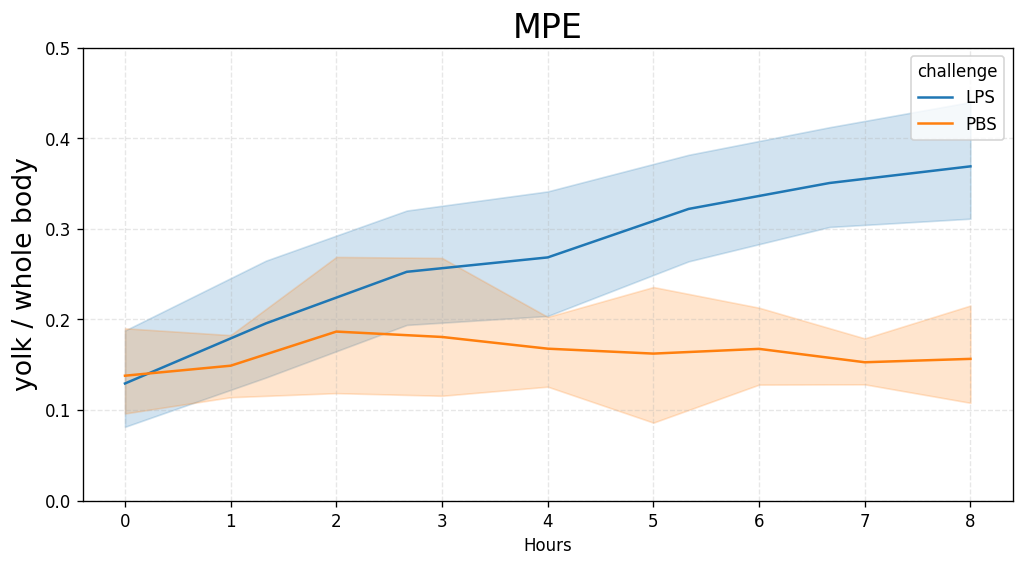

In [27]:
# mpe
os.chdir(path)
files = os.listdir(path)

ccc= pd.DataFrame()

for file in files:
    if (".csv" ) in file and ("yolk_Z") in file:
        c = pd.DataFrame()

        a=pd.read_csv(file,dtype=np.float64)
        b=pd.read_csv("whole"+file.split("yolk")[1],dtype=np.float64)
        fishnumber=file.split("_")[-1].split(".")[0]
        challenge= file.split("_")[-2]
        if ("LPS") in file:
                a["Slice"]=(a["Slice"]*4/3)-(4/3)
        if ("PBS") in file:
                a["Slice"]=a["Slice"]-1
        d=a["Count"]/b["Count"]
        c["Count"]=d
        c.insert(c.shape[1],"Slice",a["Slice"])
        c.insert(c.shape[1],"fishnumber",fishnumber)
        c.insert(c.shape[1],"challenge",challenge)
        ccc=pd.concat([ccc,c],ignore_index=True)

print(ccc)
#ccc_clear=ccc.drop(ccc[(ccc["fishnumber"]=="G001") | (ccc["challenge"]=="LPS".index)
#ccc.to_csv('all.csv')
plt.figure(figsize=(10, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.ylabel('488/405',fontsize = 16)
#df.plot.box(title="")
plt.grid(linestyle="--", alpha=0.3)
sns.lineplot(data=ccc,x="Slice",y="Count",hue="challenge",markers=True,ci=95)
plt.title("MPE",size=20)
plt.gca().set( ylim=(0, 0.5),xlabel='Hours', ylabel='yolk / whole body')
plt.show()